In [22]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords

In [2]:
df=pd.read_csv('D:\\python\\Titanic_ML\\twitter\\data.csv', sep='\t',quoting=3 )


In [3]:
df.head()

,"sentiment,text,user"
0,"""neutral"",""REGISTRTATION OPEN!! and details po..."
1,"""neutral"",""RT @exl_service: Rohit Kapoor, our ..."
2,"""positive"",""Cadre 6 sharing best practices in ..."
3,"""positive"",""Big Data Ethics and 10 Controversi..."
4,"""neutral"",""Our Group Head of Data Science, @sa..."


In [4]:
cols=['sentiment', 'text', 'user']
data=pd.read_csv('D:\\python\\Titanic_ML\\twitter\\data.csv',names=cols )


In [5]:
data.head()

,sentiment,text,user
0,sentiment,text,user
1,neutral,REGISTRTATION OPEN!! and details posted for \C...,"Data &amp; Automation\""… https://t.co/IGnqprj..."
2,neutral,"RT @exl_service: Rohit Kapoor, our Vice Chairm...",vatsalok
3,positive,Cadre 6 sharing best practices in Science. We...,ElemCadre6
4,positive,Big Data Ethics and 10 Controversial Data Scie...,NeXtPlanetRD


In [6]:
data.drop(data.index[0], inplace=True)

In [7]:
data.head()

,sentiment,text,user
1,neutral,REGISTRTATION OPEN!! and details posted for \C...,"Data &amp; Automation\""… https://t.co/IGnqprj..."
2,neutral,"RT @exl_service: Rohit Kapoor, our Vice Chairm...",vatsalok
3,positive,Cadre 6 sharing best practices in Science. We...,ElemCadre6
4,positive,Big Data Ethics and 10 Controversial Data Scie...,NeXtPlanetRD
5,neutral,"Our Group Head of Data Science, @sameerrahman9...",edit_agency


In [8]:
data.shape

(100, 3)

In [9]:
data.sentiment.value_counts()

neutral     48
positive    45
negative     7
Name: sentiment, dtype: int64

In [10]:
map_sentiment={'neutral':0, 'positive':1, 'negative':-1}
data['sentiment']=data['sentiment'].map(map_sentiment)

In [11]:
data.head(10)

,sentiment,text,user
1,0,REGISTRTATION OPEN!! and details posted for \C...,"Data &amp; Automation\""… https://t.co/IGnqprj..."
2,0,"RT @exl_service: Rohit Kapoor, our Vice Chairm...",vatsalok
3,1,Cadre 6 sharing best practices in Science. We...,ElemCadre6
4,1,Big Data Ethics and 10 Controversial Data Scie...,NeXtPlanetRD
5,0,"Our Group Head of Data Science, @sameerrahman9...",edit_agency
6,1,RT @herhoopstats: Hey followers! We are still...,cmcasarez
7,1,RT @waltatek: @SSERCDigital Keep your eye on t...,DerekHouston20
8,1,RT @Urban_RG: A fun conversation with @aloktay...,chelsbells4
9,-1,Today I had the opportunity to ask our Ministe...,Hargunie
10,1,RT @herhoopstats: Hey followers! We are still...,LaChinaRobinson


In [12]:
data['lenghth_text']=[len(t) for t in data.text]

In [13]:
data.head()

,sentiment,text,user,lenghth_text
1,0,REGISTRTATION OPEN!! and details posted for \C...,"Data &amp; Automation\""… https://t.co/IGnqprj...",95
2,0,"RT @exl_service: Rohit Kapoor, our Vice Chairm...",vatsalok,144
3,1,Cadre 6 sharing best practices in Science. We...,ElemCadre6,91
4,1,Big Data Ethics and 10 Controversial Data Scie...,NeXtPlanetRD,85
5,0,"Our Group Head of Data Science, @sameerrahman9...",edit_agency,140


In [15]:
data.drop(['user'],axis=1, inplace=True)

In [16]:
data.head()

,sentiment,text,lenghth_text
1,0,REGISTRTATION OPEN!! and details posted for \C...,95
2,0,"RT @exl_service: Rohit Kapoor, our Vice Chairm...",144
3,1,Cadre 6 sharing best practices in Science. We...,91
4,1,Big Data Ethics and 10 Controversial Data Scie...,85
5,0,"Our Group Head of Data Science, @sameerrahman9...",140


In [18]:
data[data['lenghth_text']>140].head(10)

,sentiment,text,lenghth_text
2,0,"RT @exl_service: Rohit Kapoor, our Vice Chairm...",144
6,1,RT @herhoopstats: Hey followers! We are still...,142
10,1,RT @herhoopstats: Hey followers! We are still...,142
11,1,RT @IainLJBrown: Should financial professional...,144
32,1,RT @arjson: Stats /ML/data science friends:\n\...,142
45,1,This $29 Business Intelligence bundle will set...,142
46,1,RT @herhoopstats: Hey followers! We are still...,142
49,1,Hey followers! We are still looking for more ...,142
55,1,RT @EnergyWaysrl: Today we are in Budapest inv...,144
57,0,"RT @Ronald_vanLoon: #Python overtakes R, becom...",143


In [19]:
data.text[32]

"RT @arjson: Stats /ML/data science friends:\\n\\nI'm expecting to graduate with a biostatistics PhD in summer 2019 and searching for a full tim…"

In [25]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(data.text[32], 'lxml')
print(soup.get_text())


RT @arjson: Stats /ML/data science friends:\n\nI'm expecting to graduate with a biostatistics PhD in summer 2019 and searching for a full tim…


In [26]:
import re

In [28]:
re.sub('[^a-zA-Z]', ' ', data.text[57])

'RT  Ronald vanLoon   Python overtakes R  becomes the leader in  DataScience   MachineLearning platforms n by  kdnuggets   n nhttps   t co  gn  '

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

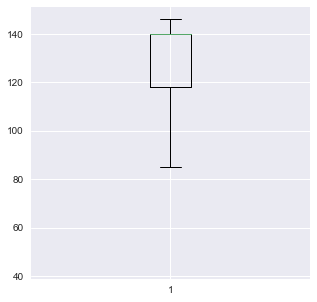

In [36]:
fig, ax=plt.subplots(figsize=(5,5))
plt.boxplot(data['lenghth_text'])
plt.show()

In [39]:
data.text[78]

'https://t.co/qbSHeeUltK Kurs: Geo.BigData(Science) 6. - 8. März 2019, ETHZ | In diesem Kurs beleuchten wir die Roll… https://t.co/DoJ4iIdko0'

In [40]:
re.sub('https?://[A-Za-z0-9./]+', '', data.text[78])

' Kurs: Geo.BigData(Science) 6. - 8. März 2019, ETHZ | In diesem Kurs beleuchten wir die Roll… '

In [42]:
from nltk.tokenize import WordPunctTokenizer
tok=WordPunctTokenizer()
part1=r'@[A-Za-z0-9]+'
part2=r'https?://[A-Za-z0-9./]+'
combined_part=r'|'.join((part1, part2))


In [45]:
def tweet_cleaner(text):
    soup=BeautifulSoup(text, 'lxml')
    souped=soup.get_text()
    stripped=re.sub(combined_part,'', souped)
    try:
        cln=stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        cln=stripped
    letter_only=re.sub('[^a-zA-Z]', '', souped)
    lower_case=letter_only.lower()
    word=tok.tokenize(lower_case)
    return (''.join(word)).strip()
testing=data.text[:100]

test_result=[]
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['registrtationopenanddetailspostedforcomplexityintransporationscienceconnectivity',
 'rtexlservicerohitkapoorourvicechairmanceohighlightsthethreefocusareasforbpmindustryreskillingrebrandingofind',
 'cadresharingbestpracticesinsciencewearedrivenbydatahttpstconsqftmxzxw',
 'bigdataethicsandcontroversialdatascienceexperimentshttpstcocviluehemx',
 'ourgroupheadofdatasciencesameerrahmanrecentlyspokewithsitkawalesfortheirmarketingleadershipserihttpstcozfzjzfjj',
 'rtherhoopstatsheyfollowerswearestilllookingformorevolunteersfortheupcomingncaaseasonnnifyouorsomeoneyouknowwoul',
 'rtwaltatekssercdigitalkeepyoureyeonthisexcitingsqadevelopmentsqacomputingdatascienceforschoolshttpstcounrcnouqic',
 'rturbanrgafunconversationwithaloktayiandhistetrascienceteamonscalinghealthcareinvestmentsgloballyalongwiththeeve',
 'todayihadtheopportunitytoaskourministeradifficultqtheagencyisbasedinsciencerelyingondataandhttpstcofjfisggit',
 'rtherhoopstatsheyfollowerswearestilllookingformorevolunteersfortheupcomin

In [65]:
nums = [0,400000,800000,1200000,1600000]


In [69]:
xrange=range